In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt


In [2]:
#loading datasets to pandas dataframe
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 1.Data Cleaning

In [3]:
#dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.shape

(284807, 31)

#### It contain 284807 rows and 31 columns 

In [5]:
#checking the missing value in each columns
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# 2.Exploratory Data Analysis

In [6]:
#distrbution of legit transcation and fradulent transaction
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

##### we can see 284315 are legit transaction and 492 data are fradulent transaction. so this dataset is highly unblanced

In [7]:
#seperating data for analysis

legit=df[df.Class==0]
fraud=df[df.Class==1]

In [8]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
#statistical measures of the data

legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
import seaborn as sns

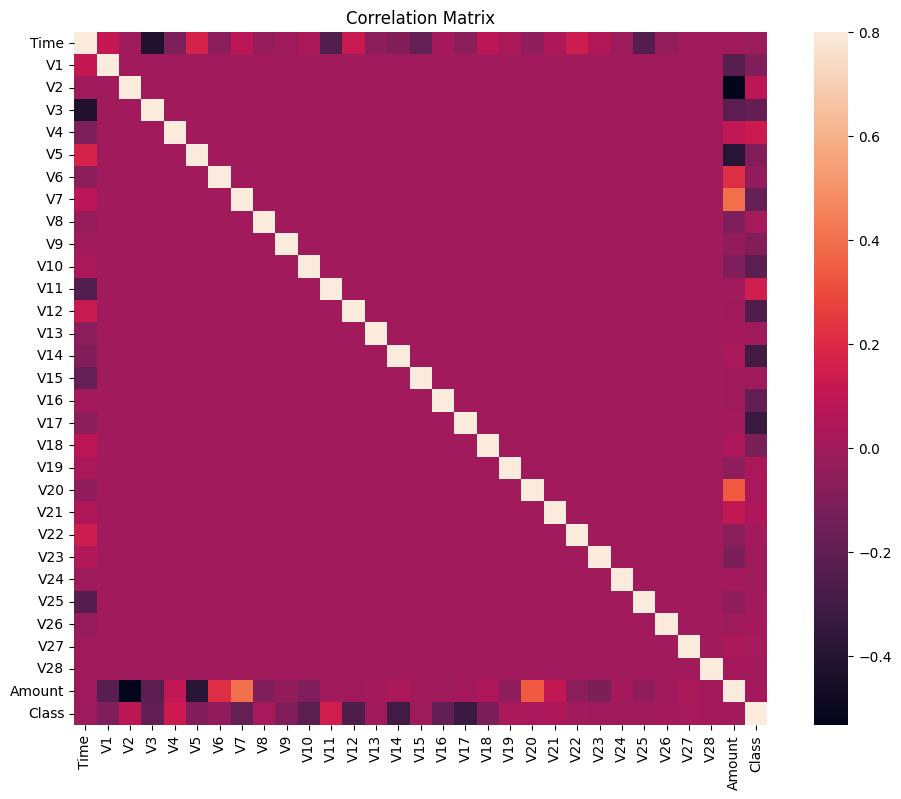

In [12]:
# Visualize the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=0.8, square=True)
plt.title("Correlation Matrix")
plt.show()

In [19]:
#compare the values for both transaction
df.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### UnderSampling

performing under sampling 

Build a sample datasets contaning similar distribution of normal transcations and fradulent  transaction

Number of fradulent transcation-->492

In [20]:
legit_sample=legit.sample(n=492)


In [21]:
#concatenating two DataFrames(legit_sample and fraud dataset)
new_df=pd.concat([legit_sample,fraud])
new_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9481,14057.0,-0.866302,0.385441,2.205799,-0.786699,0.078474,-1.116624,0.159987,-0.027530,1.270931,...,-0.250346,-0.743139,0.014653,0.324498,-0.309418,0.594898,-0.057160,0.087865,6.04,0
87093,61533.0,-0.459789,0.804889,1.937081,-0.216599,0.426057,-0.086014,1.178598,-0.390462,-0.598084,...,-0.097969,0.001146,-0.121199,0.236669,-0.405788,0.053323,-0.375699,-0.346843,29.37,0
108402,70879.0,-1.251158,0.842006,0.780761,-0.482669,0.966122,1.816240,1.041940,0.105377,-0.064424,...,0.228666,0.814259,-0.090002,-1.362653,-0.131001,-0.490799,-0.826828,-0.222803,88.04,0
272444,165092.0,1.924422,-0.241617,-0.485156,1.477745,-0.214295,0.143974,-0.356524,0.138063,1.304153,...,-0.534000,-1.330214,0.477903,0.563028,-0.340743,-1.130496,0.045574,-0.024894,15.23,0
224820,143977.0,0.506076,-2.643797,-0.174785,2.346552,-1.523924,0.981607,-0.282831,0.121131,-0.171074,...,0.624882,0.260190,-0.329854,-0.232175,-1.205024,2.138519,-0.251206,0.063080,727.80,0


In [22]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [23]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

Now, here 492 legit data and 492 fraud data in new datasets

In [24]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97314.563008,-0.009736,-0.063174,-0.005619,-0.041520,0.079845,-0.034354,0.029527,0.047937,0.096128,...,-0.000141,-0.026562,-0.027689,0.003353,0.025208,-0.041297,-0.048691,0.023730,0.001221,78.588191
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


It tells that nature of dataset is not change.Mean value of this dataset compare to previous dataset is not much difference.

### splitting the data into Features & Targets

In [25]:
x=new_df.drop(columns='Class',axis=1)
y=new_df['Class']

# 4.Training & Testing Data

In [26]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2  )

In [27]:
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


# 5. Model Building 

In [28]:
#using logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [29]:
lr.fit(x_train,y_train)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred=lr.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [32]:
accuracy=accuracy_score(y_pred,y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [33]:
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))

Accuracy: 0.9239
Precision: 0.9368
Recall: 0.9082
F1-Score: 0.9223


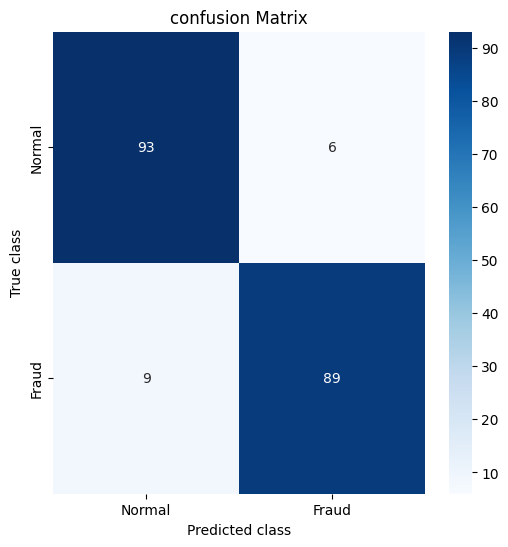

In [34]:

# Display the confusion matrix with differentiated colors
labels = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d", cmap="Blues")  
plt.title("confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()